<a href="https://colab.research.google.com/github/hanene2030/pandas/blob/main/12_grouping_imputation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grouping - Imputation

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_tmp = pd.read_csv("train.csv" , low_memory=False, parse_dates=["Date"])
df_tmp.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


### Lets say that some annoying compute malfunction corrupted x% of our sales data (set it to NaN)
#### Lets corrupt the data

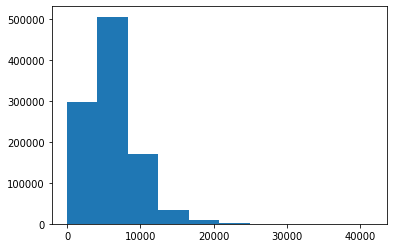

In [9]:
plt.hist(df_tmp.Sales);

(array([1.23856e+05, 5.05472e+05, 1.69792e+05, 3.32340e+04, 8.90100e+03,
        2.36200e+03, 5.65000e+02, 1.74000e+02, 2.80000e+01, 8.00000e+00]),
 array([    0. ,  4155.1,  8310.2, 12465.3, 16620.4, 20775.5, 24930.6,
        29085.7, 33240.8, 37395.9, 41551. ]),
 <a list of 10 Patch objects>)

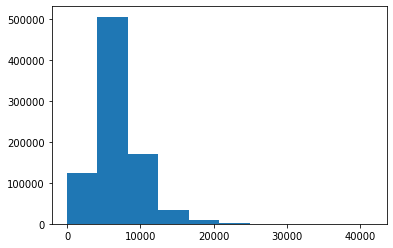

In [10]:
df = df_tmp[df_tmp.Open == 1].copy()
plt.hist(df.Sales);

In [12]:
mask = np.random.choice(10, size=df.shape[0]) == 0

In [13]:
df["NewSales"] = df.Sales.copy()

In [15]:
df.loc[mask, "NewSales"] = np.nan

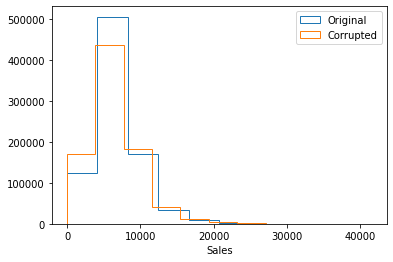

In [20]:
plt.hist(df.Sales, label="Original" , histtype="step");
plt.hist(df.NewSales.fillna(0), label="Corrupted" , histtype="step");
plt.legend(), plt.xlabel("Sales");


In [21]:
test_fix = df.NewSales.transform(lambda x: x.fillna(x.mean()))

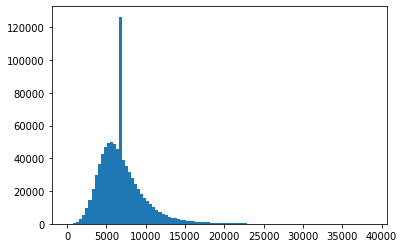

In [23]:
plt.hist(test_fix , bins=100);

In [39]:
dfg = df.groupby(["Store", "DayOfWeek"])
dfg.median().head()


Sales  Customers  Open  Promo  SchoolHoliday  NewSales
Store DayOfWeek                                                         
1     1          5302.5      581.0   1.0    1.0            0.0    5140.0
      2          4640.5      549.5   1.0    1.0            0.0    4733.5
      3          4549.5      533.0   1.0    1.0            0.0    4558.0
      4          4380.0      525.0   1.0    1.0            0.0    4346.0
      5          4651.0      552.0   1.0    1.0            0.0    4651.0

In [35]:
test_fix2 = dfg.NewSales.transform(lambda x: x.fillna(x.median()))

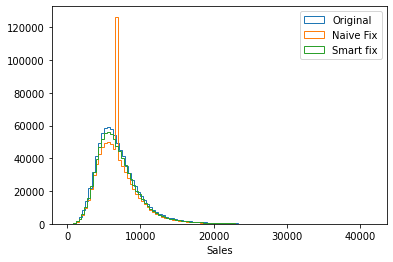

In [36]:
opts = {"histtype": "step", "bins": 100}
plt.hist(df.Sales, label="Original", **opts)
plt.hist(test_fix, label="Naive Fix", **opts)
plt.hist(test_fix2, label="Smart fix", **opts)
plt.legend(), plt.xlabel("Sales");